In [2]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
def train_val_generators(training_dir, validation_dir):

    train_datagen = ImageDataGenerator(rescale=1./255.)

    train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

    validation_datagen = ImageDataGenerator(rescale=1./255.)

    validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=16,
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))

    return train_generator, validation_generator

In [12]:
training_dir = '/kaggle/input/face-datasets/Acne/Train'
validation_dir = '/kaggle/input/face-datasets/Acne/Validation'
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 10789 images belonging to 3 classes.
Found 5176 images belonging to 3 classes.


In [13]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in mobilenet.layers:
    layer.trainable = False

model = Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/15
675/675 [==============================] - 46s 66ms/step - loss: 0.0961 - accuracy: 0.9632 - val_loss: 0.0234 - val_accuracy: 0.9900
Epoch 2/15
675/675 [==============================] - 44s 65ms/step - loss: 0.0455 - accuracy: 0.9805 - val_loss: 0.0307 - val_accuracy: 0.9907
Epoch 3/15
675/675 [==============================] - 43s 64ms/step - loss: 0.0399 - accuracy: 0.9840 - val_loss: 0.0191 - val_accuracy: 0.9905
Epoch 4/15
675/675 [==============================] - 44s 65ms/step - loss: 0.0239 - accuracy: 0.9907 - val_loss: 0.0248 - val_accuracy: 0.9913
Epoch 5/15
675/675 [==============================] - 43s 64ms/step - loss: 0.0176 - accuracy: 0.9934 - val_loss: 0.0215 - val_accuracy: 0.9917
Epoch 6/15
675/675 [==============================] - 44s 64ms/step - loss: 0.0150 - accuracy: 0.9944 - val_loss: 0.0395 - val_accuracy: 0.9909
Epoch 7/15
675/675 [==============================] - 44s 65ms/step - loss: 0.0152 - accuracy: 0.9946 - val_loss: 0.0327 - val_accuracy:

In [16]:
true_classes = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

predicted_classes = model.predict(validation_generator)
predicted_classes = np.argmax(predicted_classes, axis=1)

precision, recall, f1_score, support = precision_recall_fscore_support(
    true_classes, predicted_classes, average='weighted', labels=np.unique(predicted_classes))

accuracy = accuracy_score(true_classes, predicted_classes)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
print('Accuracy:', accuracy)

324/324 [==============================] - 14s 41ms/step
Precision: 0.8527263812161742
Recall: 0.8527820710973725
F1-Score: 0.8527522105628732
Accuracy: 0.8527820710973725


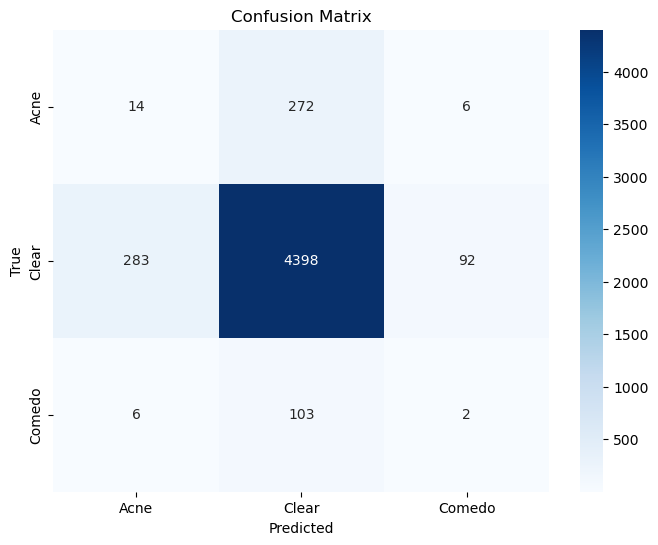

In [17]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

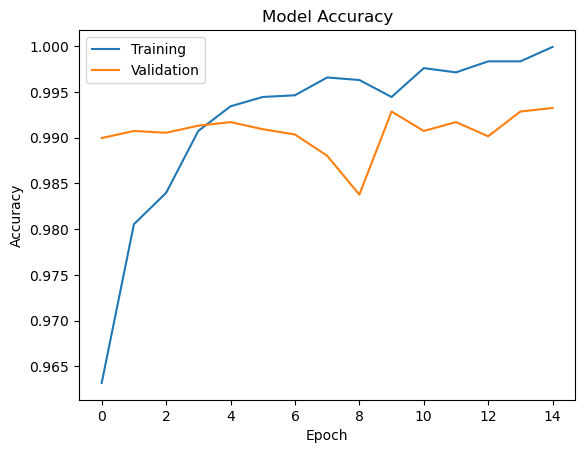

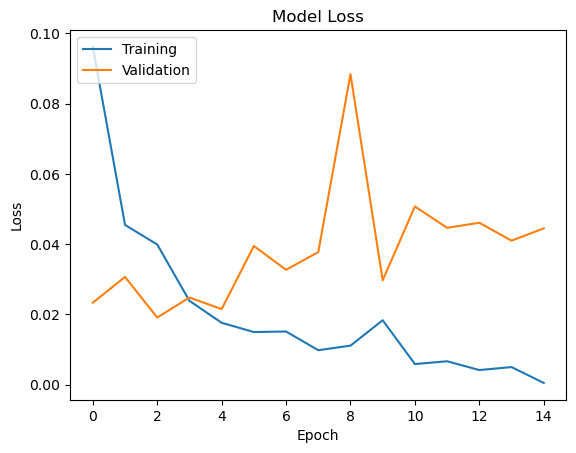

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()